In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Synthetic Data Generation with GANS

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("../input/asteroid-impacts/orbits - orbits.csv")

<AxesSubplot:>

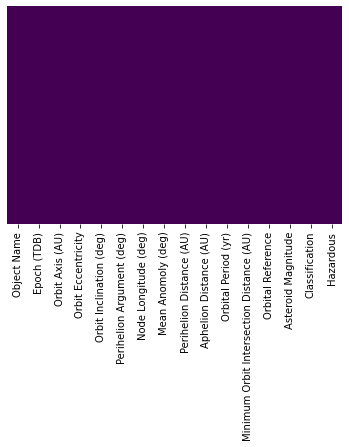

In [3]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

In [4]:
df.columns

Index(['Object Name', 'Epoch (TDB)', 'Orbit Axis (AU)', 'Orbit Eccentricity',
       'Orbit Inclination (deg)', 'Perihelion Argument (deg)',
       'Node Longitude (deg)', 'Mean Anomoly (deg)',
       'Perihelion Distance (AU)', 'Aphelion Distance (AU)',
       'Orbital Period (yr)', 'Minimum Orbit Intersection Distance (AU)',
       'Orbital Reference', 'Asteroid Magnitude', 'Classification',
       'Hazardous'],
      dtype='object')

In [5]:
df.replace(np.nan, inplace = True)
df=df.dropna()
df

,Object Name,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude,Classification,Hazardous
0,433 Eros,57800,1.4579,0.2226,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598,11.16,Amor Asteroid,False
1,719 Albert,57800,2.6385,0.5479,11.5822,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78,15.50,Amor Asteroid,False
2,887 Alinda,57800,2.4787,0.5671,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188,13.40,Amor Asteroid,False
3,1036 Ganymed,57800,2.6628,0.5338,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597,9.45,Amor Asteroid,False
4,1221 Amor,57800,1.9191,0.4356,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70,17.70,Amor Asteroid,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15630,(2017 CX1),57800,1.4096,0.2946,3.4011,353.7433,138.1226,8.7456,0.9943,1.82,1.67,0.0092,2,28.21,Apollo Asteroid,False
15631,(2017 CO5),57789,2.2612,0.4429,28.9728,147.6444,348.1501,5.7171,1.2598,3.26,3.40,0.3136,2,20.04,Amor Asteroid,False
15632,(2017 CP5),57800,1.5131,0.3275,14.2656,46.6749,130.7234,344.8663,1.0175,2.01,1.86,0.0934,1,24.74,Amor Asteroid,False
15633,(2017 CR5),57793,1.8815,0.4646,7.1647,0.2261,136.7746,1.1654,1.0073,2.76,2.58,0.0213,1,26.95,Apollo Asteroid,False


In [6]:
y = df['Classification'].astype('category').cat.codes
features = ['Epoch (TDB)', 'Orbit Axis (AU)', 'Orbit Eccentricity',
       'Orbit Inclination (deg)', 'Perihelion Argument (deg)',
       'Node Longitude (deg)', 'Mean Anomoly (deg)',
       'Perihelion Distance (AU)', 'Aphelion Distance (AU)',
       'Orbital Period (yr)', 'Minimum Orbit Intersection Distance (AU)',
       'Orbital Reference', 'Asteroid Magnitude', 'Hazardous']
X = df[features]

**Permutation Importance**

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [8]:
df.dtypes

Object Name                                  object
Epoch (TDB)                                   int64
Orbit Axis (AU)                             float64
Orbit Eccentricity                          float64
Orbit Inclination (deg)                     float64
Perihelion Argument (deg)                   float64
Node Longitude (deg)                        float64
Mean Anomoly (deg)                          float64
Perihelion Distance (AU)                    float64
Aphelion Distance (AU)                      float64
Orbital Period (yr)                         float64
Minimum Orbit Intersection Distance (AU)    float64
Orbital Reference                             int64
Asteroid Magnitude                          float64
Classification                               object
Hazardous                                      bool
dtype: object

In [9]:
y_perm = (df['Classification'])
feature_names = ['Epoch (TDB)', 'Orbit Axis (AU)', 'Orbit Eccentricity',
       'Orbit Inclination (deg)', 'Perihelion Argument (deg)',
       'Node Longitude (deg)', 'Mean Anomoly (deg)',
       'Perihelion Distance (AU)', 'Aphelion Distance (AU)',
       'Orbital Period (yr)', 'Minimum Orbit Intersection Distance (AU)',
       'Orbital Reference', 'Asteroid Magnitude', 'Hazardous']
X_perm = df[features]
train_X, val_X, train_y, val_y = train_test_split(X_perm, y_perm, train_size = 90,random_state=1)
my_model = RandomForestClassifier(n_estimators=100,
                                  random_state=0).fit(train_X, train_y)

In [10]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(my_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.4201 ± 0.0102,Perihelion Distance (AU)
0.0496 ± 0.0004,Orbit Axis (AU)
0.0308 ± 0.0005,Orbital Period (yr)
0.0022 ± 0.0005,Minimum Orbit Intersection Distance (AU)
0.0013 ± 0.0006,Orbit Eccentricity
0.0005 ± 0.0004,Aphelion Distance (AU)
0.0002 ± 0.0005,Node Longitude (deg)
0.0002 ± 0.0002,Perihelion Argument (deg)
0.0001 ± 0.0002,Mean Anomoly (deg)
-0.0001 ± 0.0002,Epoch (TDB)


In [11]:
df = pd.read_csv('../input/asteroid-impacts/orbits - orbits.csv')


In [12]:
df.columns


Index(['Object Name', 'Epoch (TDB)', 'Orbit Axis (AU)', 'Orbit Eccentricity',
       'Orbit Inclination (deg)', 'Perihelion Argument (deg)',
       'Node Longitude (deg)', 'Mean Anomoly (deg)',
       'Perihelion Distance (AU)', 'Aphelion Distance (AU)',
       'Orbital Period (yr)', 'Minimum Orbit Intersection Distance (AU)',
       'Orbital Reference', 'Asteroid Magnitude', 'Classification',
       'Hazardous'],
      dtype='object')

In [13]:
df.drop(['Object Name'], axis=1, inplace=True)
print(df.columns)

Index(['Epoch (TDB)', 'Orbit Axis (AU)', 'Orbit Eccentricity',
       'Orbit Inclination (deg)', 'Perihelion Argument (deg)',
       'Node Longitude (deg)', 'Mean Anomoly (deg)',
       'Perihelion Distance (AU)', 'Aphelion Distance (AU)',
       'Orbital Period (yr)', 'Minimum Orbit Intersection Distance (AU)',
       'Orbital Reference', 'Asteroid Magnitude', 'Classification',
       'Hazardous'],
      dtype='object')


In [14]:
df.replace(np.nan, inplace = True)
df=df.dropna()
df

,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude,Classification,Hazardous
0,57800,1.4579,0.2226,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598,11.16,Amor Asteroid,False
1,57800,2.6385,0.5479,11.5822,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78,15.50,Amor Asteroid,False
2,57800,2.4787,0.5671,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188,13.40,Amor Asteroid,False
3,57800,2.6628,0.5338,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597,9.45,Amor Asteroid,False
4,57800,1.9191,0.4356,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70,17.70,Amor Asteroid,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15630,57800,1.4096,0.2946,3.4011,353.7433,138.1226,8.7456,0.9943,1.82,1.67,0.0092,2,28.21,Apollo Asteroid,False
15631,57789,2.2612,0.4429,28.9728,147.6444,348.1501,5.7171,1.2598,3.26,3.40,0.3136,2,20.04,Amor Asteroid,False
15632,57800,1.5131,0.3275,14.2656,46.6749,130.7234,344.8663,1.0175,2.01,1.86,0.0934,1,24.74,Amor Asteroid,False
15633,57793,1.8815,0.4646,7.1647,0.2261,136.7746,1.1654,1.0073,2.76,2.58,0.0213,1,26.95,Apollo Asteroid,False


In [15]:
df.replace(np.nan, inplace = True)
df=df.dropna()
df

,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude,Classification,Hazardous
0,57800,1.4579,0.2226,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598,11.16,Amor Asteroid,False
1,57800,2.6385,0.5479,11.5822,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78,15.50,Amor Asteroid,False
2,57800,2.4787,0.5671,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188,13.40,Amor Asteroid,False
3,57800,2.6628,0.5338,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597,9.45,Amor Asteroid,False
4,57800,1.9191,0.4356,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70,17.70,Amor Asteroid,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15630,57800,1.4096,0.2946,3.4011,353.7433,138.1226,8.7456,0.9943,1.82,1.67,0.0092,2,28.21,Apollo Asteroid,False
15631,57789,2.2612,0.4429,28.9728,147.6444,348.1501,5.7171,1.2598,3.26,3.40,0.3136,2,20.04,Amor Asteroid,False
15632,57800,1.5131,0.3275,14.2656,46.6749,130.7234,344.8663,1.0175,2.01,1.86,0.0934,1,24.74,Amor Asteroid,False
15633,57793,1.8815,0.4646,7.1647,0.2261,136.7746,1.1654,1.0073,2.76,2.58,0.0213,1,26.95,Apollo Asteroid,False


In [16]:
df.dtypes

Epoch (TDB)                                   int64
Orbit Axis (AU)                             float64
Orbit Eccentricity                          float64
Orbit Inclination (deg)                     float64
Perihelion Argument (deg)                   float64
Node Longitude (deg)                        float64
Mean Anomoly (deg)                          float64
Perihelion Distance (AU)                    float64
Aphelion Distance (AU)                      float64
Orbital Period (yr)                         float64
Minimum Orbit Intersection Distance (AU)    float64
Orbital Reference                             int64
Asteroid Magnitude                          float64
Classification                               object
Hazardous                                      bool
dtype: object

In [17]:
# data configuration


file_name = "../input/asteroid-impacts/orbits - orbits.csv"
columns_to_drop = ['Object Name']
categorical_features = ['Classification']
continuous_features = ['Epoch (TDB)', 'Orbit Eccentricity', 'Perihelion Argument (deg)',
       'Node Longitude (deg)', 'Mean Anomoly (deg)', 'Orbit Inclination (deg)',
       'Aphelion Distance (AU)','Asteroid Magnitude',
       'Orbital Period (yr)', 'Minimum Orbit Intersection Distance (AU)',
       'Orbital Reference' ]
col_group_by = 'Hazardous'
col1, col2 = 'Perihelion Distance (AU)', 'Orbit Axis (AU)'
#col_group_by = 'Hazardous'
#col1, col2 = 'Perihelion Distance (AU)',  'Orbit Axis (AU)'

# training configuration
noise_dim = 256
dim = 128
batch_size = 16

log_step = 100
epochs = 5000+1
learning_rate = 5e-4
models_dir = 'model'

In [18]:
import pandas as pd

df = pd.read_csv(file_name)
df.drop(columns_to_drop, axis=1, inplace=True)
print(df.columns)

Index(['Epoch (TDB)', 'Orbit Axis (AU)', 'Orbit Eccentricity',
       'Orbit Inclination (deg)', 'Perihelion Argument (deg)',
       'Node Longitude (deg)', 'Mean Anomoly (deg)',
       'Perihelion Distance (AU)', 'Aphelion Distance (AU)',
       'Orbital Period (yr)', 'Minimum Orbit Intersection Distance (AU)',
       'Orbital Reference', 'Asteroid Magnitude', 'Classification',
       'Hazardous'],
      dtype='object')


In [19]:
for column in categorical_features:
    df[column] = df[column].astype('category').cat.codes

df.head()

,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude,Classification,Hazardous
0,57800,1.4579,0.2226,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598,11.16,0,False
1,57800,2.6385,0.5479,11.5822,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78,15.50,0,False
2,57800,2.4787,0.5671,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188,13.40,0,False
3,57800,2.6628,0.5338,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597,9.45,0,False
4,57800,1.9191,0.4356,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70,17.70,0,False


In [20]:
import numpy as np

for column in continuous_features:
    min = df[column].min()
    max = df[column].max()
    feature_bins = pd.cut(df[column], bins=np.linspace(min, max, 21), labels=False)
    df.drop([column], axis=1, inplace=True)
    df = pd.concat([df, feature_bins], axis=1)
    print(df)

       Orbit Axis (AU)  Orbit Eccentricity  Orbit Inclination (deg)  \
0               1.4579              0.2226                  10.8277   
1               2.6385              0.5479                  11.5822   
2               2.4787              0.5671                   9.3561   
3               2.6628              0.5338                  26.6929   
4               1.9191              0.4356                  11.8795   
...                ...                 ...                      ...   
15630           1.4096              0.2946                   3.4011   
15631           2.2612              0.4429                  28.9728   
15632           1.5131              0.3275                  14.2656   
15633           1.8815              0.4646                   7.1647   
15634           2.8043              0.6672                   4.7249   

       Perihelion Argument (deg)  Node Longitude (deg)  Mean Anomoly (deg)  \
0                       178.8050              304.3265            319

In [21]:
df.replace(np.nan, inplace = True)
df=df.dropna()
df

,Orbit Axis (AU),Perihelion Distance (AU),Classification,Hazardous,Epoch (TDB),Orbit Eccentricity,Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Orbit Inclination (deg),Aphelion Distance (AU),Asteroid Magnitude,Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference
0,1.4579,1.1335,0,False,19.0,4.0,9.0,16.0,17.0,1.0,0.0,1.0,0.0,4.0,18.0
1,2.6385,1.1928,0,False,19.0,11.0,8.0,10.0,12.0,1.0,1.0,5.0,0.0,5.0,2.0
2,2.4787,1.0731,0,False,19.0,11.0,19.0,6.0,19.0,1.0,1.0,3.0,0.0,2.0,5.0
3,2.6628,1.2413,0,False,19.0,10.0,7.0,11.0,5.0,3.0,1.0,3.0,0.0,9.0,18.0
4,1.9191,1.0832,0,False,19.0,8.0,1.0,9.0,17.0,1.0,0.0,6.0,0.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15630,1.4096,0.9943,2,False,19.0,6.0,19.0,7.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0
15631,2.2612,1.2598,0,False,19.0,9.0,8.0,19.0,0.0,3.0,1.0,8.0,0.0,8.0,0.0
15632,1.5131,1.0175,0,False,19.0,6.0,2.0,7.0,19.0,1.0,0.0,12.0,0.0,2.0,0.0
15633,1.8815,1.0073,2,False,19.0,9.0,0.0,7.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0


In [22]:
from sklearn.preprocessing import PowerTransformer


df[df.columns] = PowerTransformer(method='yeo-johnson', standardize=True, copy=True).fit_transform(df[df.columns])

print(df)

       Orbit Axis (AU)  Perihelion Distance (AU)  Classification  Hazardous  \
0            -0.488489                  0.963893       -1.231842  -0.358318   
1             1.399419                  1.314854       -1.231842  -0.358318   
2             1.186610                  0.628693       -1.231842  -0.358318   
3             1.430886                  1.618553       -1.231842  -0.358318   
4             0.347344                  0.683214       -1.231842  -0.358318   
...                ...                       ...             ...        ...   
15630        -0.585783                  0.223822        0.667894  -0.358318   
15631         0.879186                  1.738443       -1.231842  -0.358318   
15632        -0.379815                  0.339300       -1.231842  -0.358318   
15633         0.284780                  0.288152        0.667894  -0.358318   
15634         1.609714                 -0.065877        0.667894   2.790814   

       Epoch (TDB)  Orbit Eccentricity  Perihelion 

In [23]:
from sklearn.preprocessing import PowerTransformer


pw= PowerTransformer(method='yeo-johnson', standardize=True, copy=True)
pwt=pw.fit_transform(df[df.columns])

print(df)

       Orbit Axis (AU)  Perihelion Distance (AU)  Classification  Hazardous  \
0            -0.488489                  0.963893       -1.231842  -0.358318   
1             1.399419                  1.314854       -1.231842  -0.358318   
2             1.186610                  0.628693       -1.231842  -0.358318   
3             1.430886                  1.618553       -1.231842  -0.358318   
4             0.347344                  0.683214       -1.231842  -0.358318   
...                ...                       ...             ...        ...   
15630        -0.585783                  0.223822        0.667894  -0.358318   
15631         0.879186                  1.738443       -1.231842  -0.358318   
15632        -0.379815                  0.339300       -1.231842  -0.358318   
15633         0.284780                  0.288152        0.667894  -0.358318   
15634         1.609714                 -0.065877        0.667894   2.790814   

       Epoch (TDB)  Orbit Eccentricity  Perihelion 

In [24]:
df[df.columns]=pwt

In [25]:
df

,Orbit Axis (AU),Perihelion Distance (AU),Classification,Hazardous,Epoch (TDB),Orbit Eccentricity,Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Orbit Inclination (deg),Aphelion Distance (AU),Asteroid Magnitude,Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference
0,-0.498955,0.966271,-1.194334,-0.358318,0.425837,-1.277977,-0.098895,1.182361,1.190108,0.364340,-0.849433,-3.945797,-0.109426,0.921361,2.219180
1,1.413892,1.343028,-1.194334,-0.358318,0.425837,0.611043,-0.266987,0.191382,0.488734,0.364340,1.163987,-2.127230,-0.109426,1.089430,2.219103
2,1.193771,0.612167,-1.194334,-0.358318,0.425837,0.611043,1.632040,-0.490244,1.460759,0.364340,1.163987,-2.999161,-0.109426,0.391680,2.219179
3,1.446509,1.673345,-1.194334,-0.358318,0.425837,0.332823,-0.434390,0.359292,-0.562458,1.256603,1.163987,-2.999161,-0.109426,1.511423,2.219180
4,0.335085,0.669342,-1.194334,-0.358318,0.425837,-0.214090,-1.505111,0.022582,1.190108,0.364340,-0.849433,-1.708632,-0.109426,0.701379,2.219103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15630,-0.594590,0.193481,0.596328,-0.358318,0.425837,-0.748777,1.632040,-0.317364,-1.554907,-1.076818,-0.849433,1.806213,-0.109426,-1.155594,-0.450727
15631,0.877337,1.804739,-1.194334,-0.358318,0.425837,0.057532,-0.266987,1.662733,-1.554907,1.256603,1.163987,-0.895762,-0.109426,1.429823,-0.450727
15632,-0.391833,0.311763,-1.194334,-0.358318,0.425837,-0.748777,-1.307338,-0.317364,1.460759,0.364340,-0.849433,0.668502,-0.109426,0.391680,-0.450727
15633,0.271809,0.259253,0.596328,-0.358318,0.425837,0.057532,-1.726427,-0.317364,-1.554907,-1.076818,-0.849433,1.430130,-0.109426,-1.155594,-0.450727


In [26]:
# calculate wasserstein loss
#def wasserstein_loss(y_true, y_pred):
 #   return backend.mean(y_true * y_pred)

In [61]:
from tensorflow.keras.optimizers import Adam, RMSprop

In [67]:
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, LeakyReLU
from tensorflow.keras import Model

from tensorflow.keras.optimizers import Adam, RMSprop

class GAN():
    
    def __init__(self, gan_args):
        [self.batch_size, lr, self.noise_dim,
         self.data_dim, layers_dim] = gan_args

        self.generator = Generator(self.batch_size).\
            build_model(input_shape=(self.noise_dim,), dim=layers_dim, data_dim=self.data_dim)

        self.discriminator = Discriminator(self.batch_size).\
            build_model(input_shape=(self.data_dim,), dim=layers_dim)

        optimizer = RMSprop(lr, lr=0.00005)

        # Build and compile the discriminator
        self.discriminator.compile(loss='binary_crossentropy',
                                   optimizer=optimizer,
                                   metrics=['accuracy'])

        # The generator takes noise as input and generates imgs
        z = Input(shape=(self.noise_dim,))
        record = self.generator(z)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated images as input and determines validity
        validity = self.discriminator(record)

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, validity)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)

    def get_data_batch(self, train, batch_size, seed=0):
        # # random sampling - some samples will have excessively low or high sampling, but easy to implement
        # np.random.seed(seed)
        # x = train.loc[ np.random.choice(train.index, batch_size) ].values
        # iterate through shuffled indices, so every sample gets covered evenly

        start_i = (batch_size * seed) % len(train)
        stop_i = start_i + batch_size
        shuffle_seed = (batch_size * seed) // len(train)
        np.random.seed(shuffle_seed)
        train_ix = np.random.choice(list(train.index), replace=False, size=len(train))  # wasteful to shuffle every time
        train_ix = list(train_ix) + list(train_ix)  # duplicate to cover ranges past the end of the set
        x = train.loc[train_ix[start_i: stop_i]].values
        return np.reshape(x, (batch_size, -1))
        
    def train(self, data, train_arguments):
        [cache_prefix, epochs, sample_interval] = train_arguments
        
        data_cols = data.columns

        # Adversarial ground truths
        valid = np.ones((self.batch_size, 1))
        fake = np.zeros((self.batch_size, 1))

        for epoch in range(epochs):    
            # ---------------------
            #  Train Discriminator
            # ---------------------
            batch_data = self.get_data_batch(data, self.batch_size)
            noise = tf.random.normal((self.batch_size, self.noise_dim))

            # Generate a batch of new images
            gen_data = self.generator.predict(noise)
    
            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch(batch_data, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_data, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    
            # ---------------------
            #  Train Generator
            # ---------------------
            noise = tf.random.normal((self.batch_size, self.noise_dim))
            # Train the generator (to have the discriminator label samples as valid)
            g_loss = self.combined.train_on_batch(noise, valid)
    
            # Plot the progress
            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100 * d_loss[1], g_loss))
    
            # If at save interval => save generated events
            if epoch % sample_interval == 0:
                #Test here data generation step
                # save model checkpoints
                model_checkpoint_base_name = 'model/' + cache_prefix + '_{}_model_weights_step_{}.h5'
                self.generator.save_weights(model_checkpoint_base_name.format('generator', epoch))
                self.discriminator.save_weights(model_checkpoint_base_name.format('discriminator', epoch))

                #Here is generating the data
                z = tf.random.normal((432, self.noise_dim))
                gen_data = self.generator(z)
                print('generated_data')

    def save(self, path, name):
        assert os.path.isdir(path) == True, \
            "Please provide a valid path. Path must be a directory."
        model_path = os.path.join(path, name)
        self.generator.save_weights(model_path)  # Load the generator
        return
    
    def load(self, path):
        assert os.path.isdir(path) == True, \
            "Please provide a valid path. Path must be a directory."
        self.generator = Generator(self.batch_size)
        self.generator = self.generator.load_weights(path)
        return self.generator
    
class Generator():
    def __init__(self, batch_size):
        self.batch_size=batch_size
        
    def build_model(self, input_shape, dim, data_dim):
        input= Input(shape=input_shape, batch_size=self.batch_size)
        x = Dense(dim, activation='LeakyReLU')(input)
        x = Dense(dim * 2, activation='LeakyReLU')(x)
        x = Dense(dim * 4, activation='LeakyReLU')(x)
        x = Dense(data_dim)(x)
        return Model(inputs=input, outputs=x)

class Discriminator():
    def __init__(self,batch_size):
        self.batch_size=batch_size
    
    def build_model(self, input_shape, dim):
        input = Input(shape=input_shape, batch_size=self.batch_size)
        x = Dense(dim * 4, activation='LeakyReLU')(input)
        x = Dropout(0.1)(x)
        x = Dense(dim * 2, activation='LeakyReLU')(x)
        x = Dropout(0.1)(x)
        x = Dense(dim, activation='LeakyReLU')(x)
        x = Dense(1, activation='sigmoid')(x)
        return Model(inputs=input, outputs=x)

In [68]:
data_cols = df.columns

In [69]:
#Define the GAN and training parameters
df[data_cols] = df[data_cols]

print(df.shape[1])

gan_args = [batch_size, learning_rate, noise_dim, df.shape[1], dim]
train_args = ['', epochs, log_step]

15


In [70]:
!mkdir model
!mkdir model/gan
!mkdir model/gan/saved

mkdir: cannot create directory ‘model’: File exists
mkdir: cannot create directory ‘model/gan’: File exists
mkdir: cannot create directory ‘model/gan/saved’: File exists


In [ ]:
from keras import backend

In [72]:
model = GAN

#Training the GAN model chosen: Vanilla GAN, CGAN, DCGAN, etc.
synthesizer = model(gan_args)
synthesizer.train(df, train_args)


0 [D loss: 0.721201, acc.: 40.62%] [G loss: 0.705985]
generated_data
1 [D loss: 0.689520, acc.: 43.75%] [G loss: 0.698953]
2 [D loss: 0.672403, acc.: 53.12%] [G loss: 0.674946]
3 [D loss: 0.686989, acc.: 31.25%] [G loss: 0.692889]
4 [D loss: 0.662164, acc.: 53.12%] [G loss: 0.686088]
5 [D loss: 0.661785, acc.: 40.62%] [G loss: 0.672233]
6 [D loss: 0.646621, acc.: 53.12%] [G loss: 0.681453]
7 [D loss: 0.645809, acc.: 65.62%] [G loss: 0.675923]
8 [D loss: 0.641627, acc.: 53.12%] [G loss: 0.683771]
9 [D loss: 0.635505, acc.: 53.12%] [G loss: 0.662480]
10 [D loss: 0.633702, acc.: 59.38%] [G loss: 0.668839]
11 [D loss: 0.631603, acc.: 56.25%] [G loss: 0.682296]
12 [D loss: 0.625676, acc.: 56.25%] [G loss: 0.653372]
13 [D loss: 0.642504, acc.: 53.12%] [G loss: 0.670655]
14 [D loss: 0.644444, acc.: 46.88%] [G loss: 0.653654]
15 [D loss: 0.637374, acc.: 46.88%] [G loss: 0.651564]
16 [D loss: 0.619660, acc.: 53.12%] [G loss: 0.664651]
17 [D loss: 0.631127, acc.: 50.00%] [G loss: 0.617614]
18 [D

In [83]:
!mkdir model/gan


mkdir: cannot create directory ‘model/gan’: File exists


In [84]:
synthesizer.save('model/gan/saved', 'asteroid')

In [85]:
synthesizer.generator.summary()

Model: "model_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        [(16, 256)]               0         
_________________________________________________________________
dense_72 (Dense)             (16, 128)                 32896     
_________________________________________________________________
dense_73 (Dense)             (16, 256)                 33024     
_________________________________________________________________
dense_74 (Dense)             (16, 512)                 131584    
_________________________________________________________________
dense_75 (Dense)             (16, 15)                  7695      
Total params: 205,199
Trainable params: 205,199
Non-trainable params: 0
_________________________________________________________________


In [86]:
synthesizer.discriminator.summary()

Model: "model_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        [(16, 15)]                0         
_________________________________________________________________
dense_76 (Dense)             (16, 512)                 8192      
_________________________________________________________________
dropout_18 (Dropout)         (16, 512)                 0         
_________________________________________________________________
dense_77 (Dense)             (16, 256)                 131328    
_________________________________________________________________
dropout_19 (Dropout)         (16, 256)                 0         
_________________________________________________________________
dense_78 (Dense)             (16, 128)                 32896     
_________________________________________________________________
dense_79 (Dense)             (16, 1)                   129

Now, that we have trained the model let's see if the generated data is similar to the actual data.

We plot the generated data for some of the model steps and see how the plot for the generated data changes as the networks learns the embedding more accurately.

In [87]:
models = {'GAN': ['GAN', False, synthesizer.generator]}

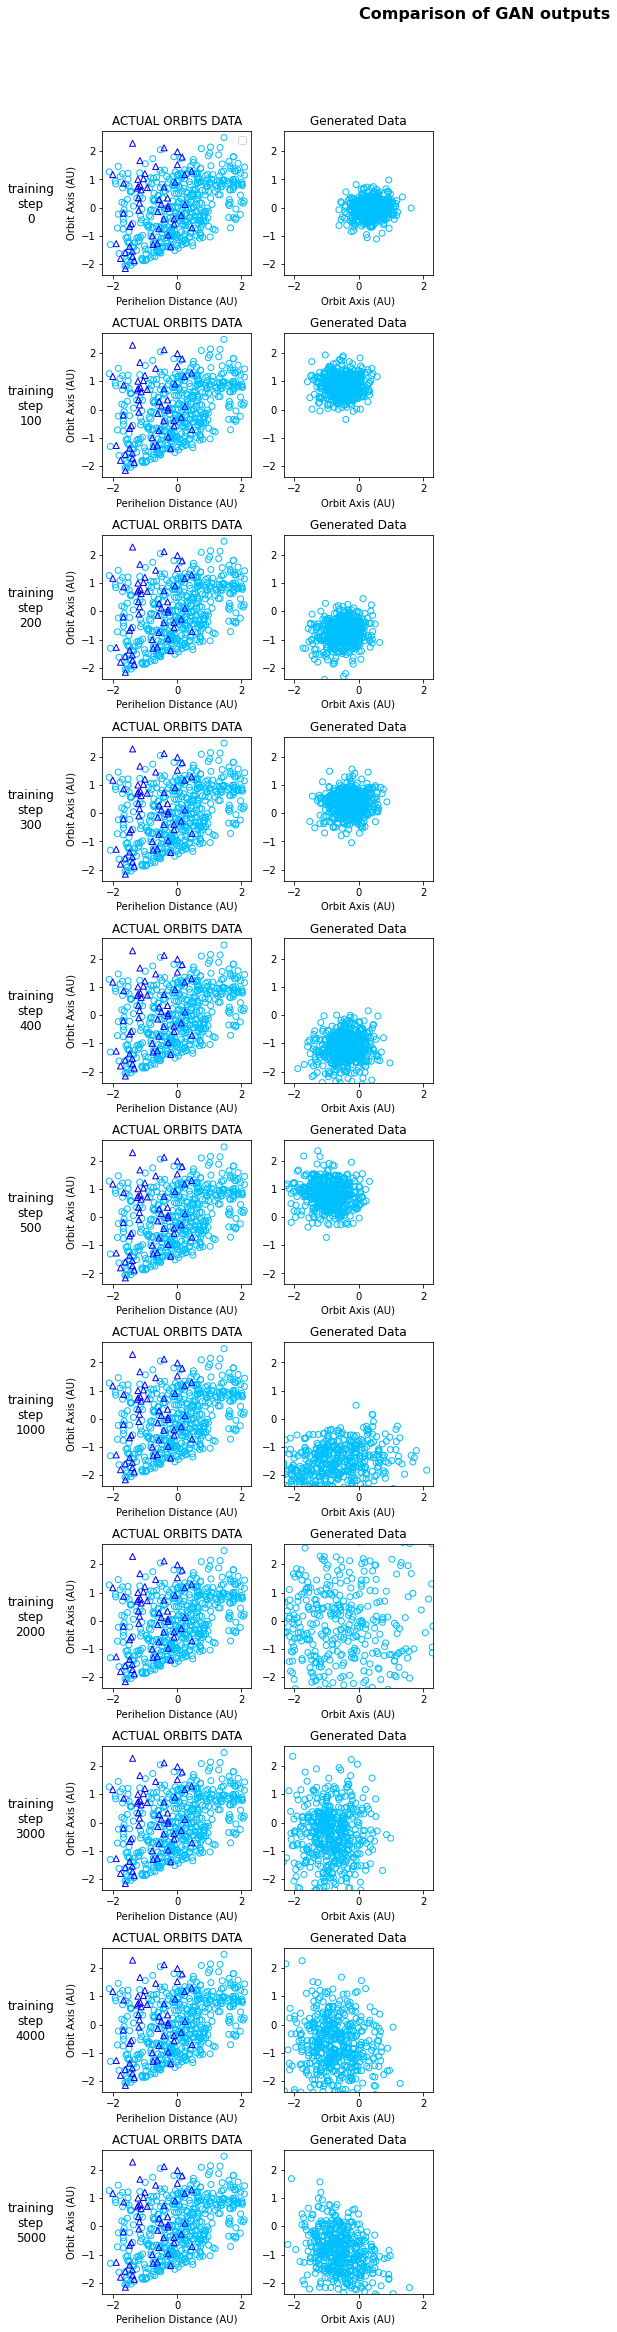

In [89]:
import matplotlib.pyplot as plt

# Setup parameters visualization parameters
seed = 17
test_size = 492 # number of fraud cases
noise_dim = 256
col_group_by = 'Hazardous'
col1, col2 = 'Perihelion Distance (AU)',  'Orbit Axis (AU)'

np.random.seed(seed)
z = np.random.normal(size=(test_size, noise_dim))
real = synthesizer.get_data_batch(train=df, batch_size=test_size, seed=seed)
real_samples = pd.DataFrame(real, columns=data_cols)

model_names = ['GAN']
colors = ['deepskyblue','blue']
markers = ['o','^']

base_dir = 'model/'

#Actual fraud data visualization
model_steps = [ 0, 100, 200, 300, 400, 500, 1000, 2000, 3000, 4000, 5000]
rows = len(model_steps)
columns = 5

axarr = [[]]*len(model_steps)

fig = plt.figure(figsize=(14,rows*3))

for model_step_ix, model_step in enumerate(model_steps):        
    axarr[model_step_ix] = plt.subplot(rows, columns, model_step_ix*columns + 1)
    
    for group, color, marker in zip(real_samples.groupby(col_group_by), colors, markers):
        plt.scatter( group[1][[col1]], group[1][[col2]], marker=marker, edgecolors=color, facecolors='none' )
    
    plt.title('ACTUAL ORBITS DATA')
    plt.ylabel(col2) # Only add y label to left plot
    plt.xlabel(col1)
    xlims, ylims = axarr[model_step_ix].get_xlim(), axarr[model_step_ix].get_ylim()
    
    if model_step_ix == 0: 
        legend = plt.legend()
        legend.get_frame().set_facecolor('white')
    
    i=0
    [model_name, with_class, generator_model] = models['GAN']

    generator_model.load_weights( base_dir + '_generator_model_weights_step_'+str(model_step)+'.h5')

    ax = plt.subplot(rows, columns, model_step_ix*columns + 1 + (i+1) )

    g_z = generator_model.predict(z)

    gen_samples = pd.DataFrame(g_z, columns=data_cols)
    gen_samples.to_csv('Generated_sample.csv')
    plt.scatter( gen_samples[[col1]], gen_samples[[col2]], marker=markers[0], edgecolors=colors[0], facecolors='none' )
    plt.title("Generated Data")   
    plt.xlabel(data_cols[0])
    ax.set_xlim(xlims), ax.set_ylim(ylims)

plt.suptitle('Comparison of GAN outputs', size=16, fontweight='bold')
plt.tight_layout(rect=[0.075,0,1,0.95])

# Adding text labels for traning steps
vpositions = np.array([ i._position.bounds[1] for i in axarr ])
vpositions += ((vpositions[0] - vpositions[1]) * 0.35 )
for model_step_ix, model_step in enumerate( model_steps ):
    fig.text( 0.05, vpositions[model_step_ix], 'training\nstep\n'+str(model_step), ha='center', va='center', size=12)

plt.savefig('Comparison_of_GAN_outputs.png')

In [90]:
g_z=pw.inverse_transform(g_z)
gen_samples = pd.DataFrame(g_z, columns=data_cols)
gen_samples.to_csv('Generated_sample.csv')

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  "X does not have valid feature names, but"


Now let's try to do a feature by feature comparision between the generated data and the actual data. We will use python's table_evaluator library to compare the features.

In [93]:
!pip install table_evaluator

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.0/285.0 KB 531.8 kB/s eta 0:00:00a 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [91]:

print(gen_samples.columns)
print(df.shape, gen_samples.shape)

Index(['Orbit Axis (AU)', 'Perihelion Distance (AU)', 'Classification',
       'Hazardous', 'Epoch (TDB)', 'Orbit Eccentricity',
       'Perihelion Argument (deg)', 'Node Longitude (deg)',
       'Mean Anomoly (deg)', 'Orbit Inclination (deg)',
       'Aphelion Distance (AU)', 'Asteroid Magnitude', 'Orbital Period (yr)',
       'Minimum Orbit Intersection Distance (AU)', 'Orbital Reference'],
      dtype='object')
(15635, 15) (492, 15)


In [95]:
from table_evaluator import TableEvaluator


15635 492


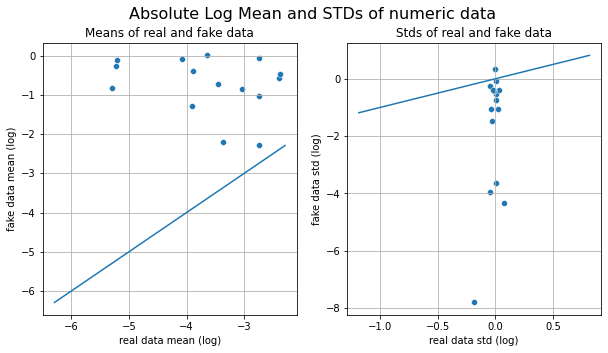

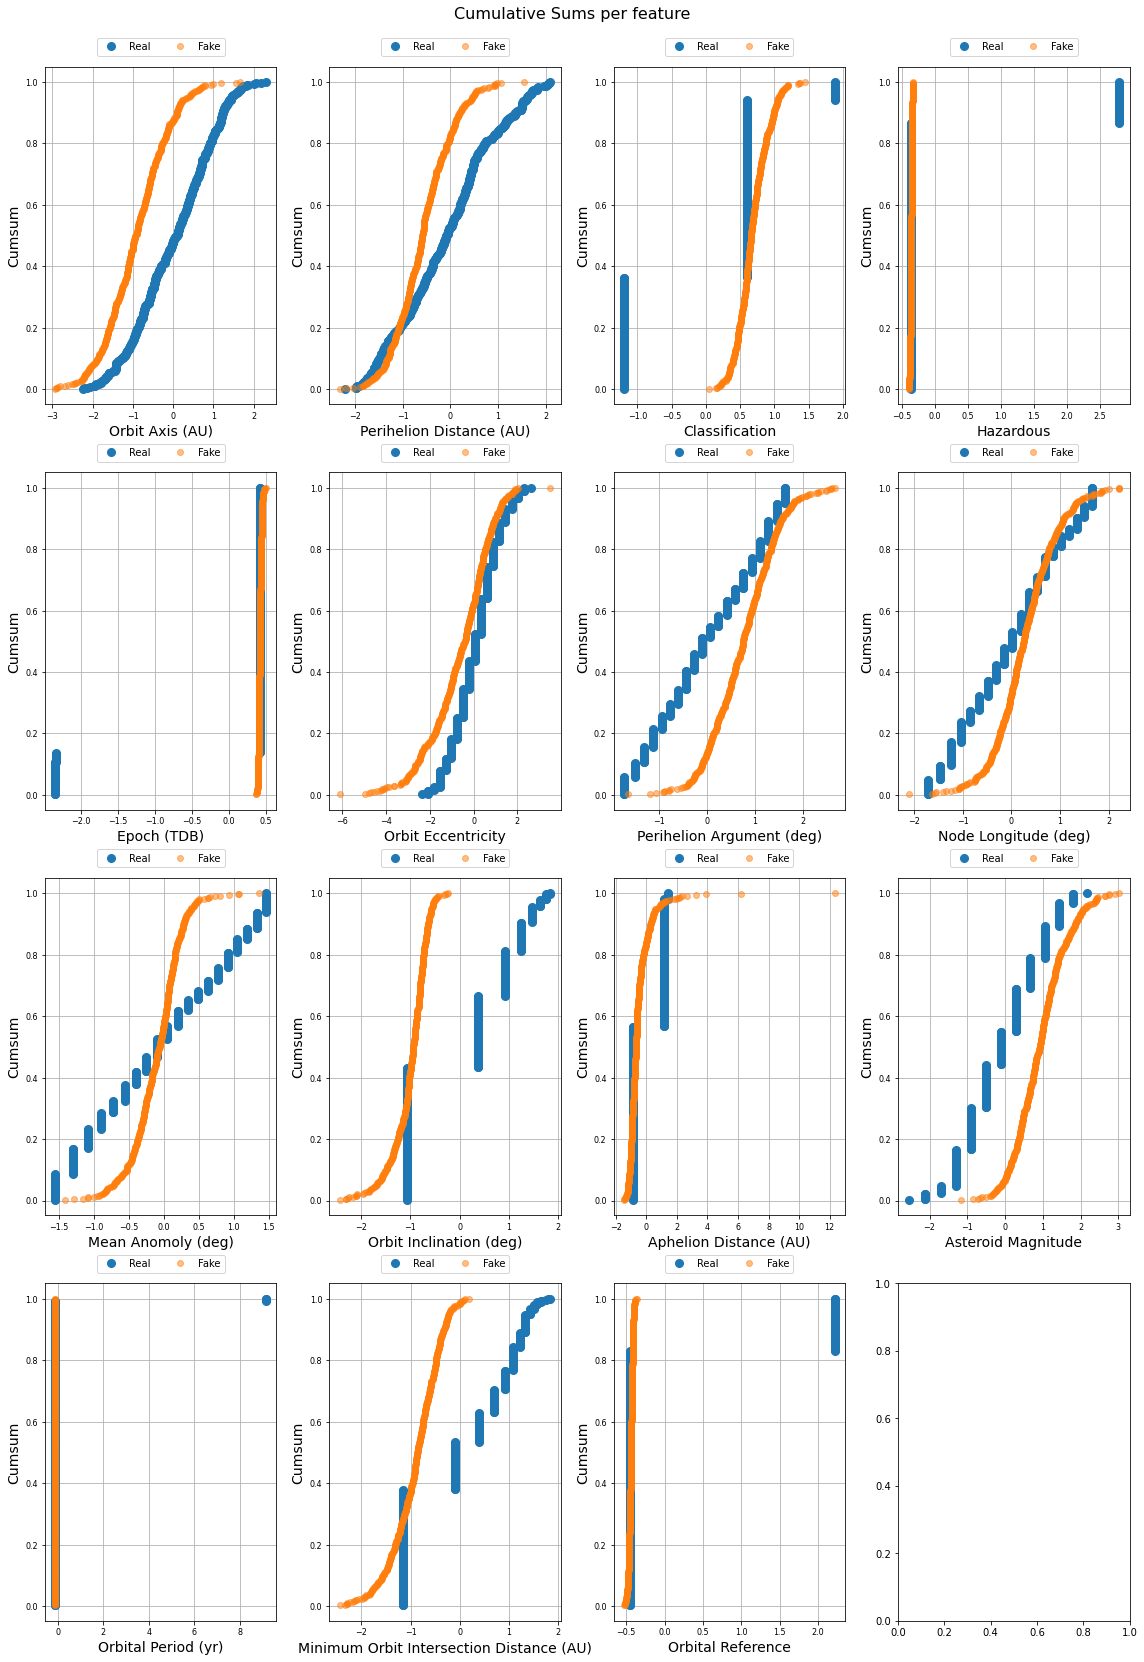

ValueError: cannot reindex from a duplicate axis

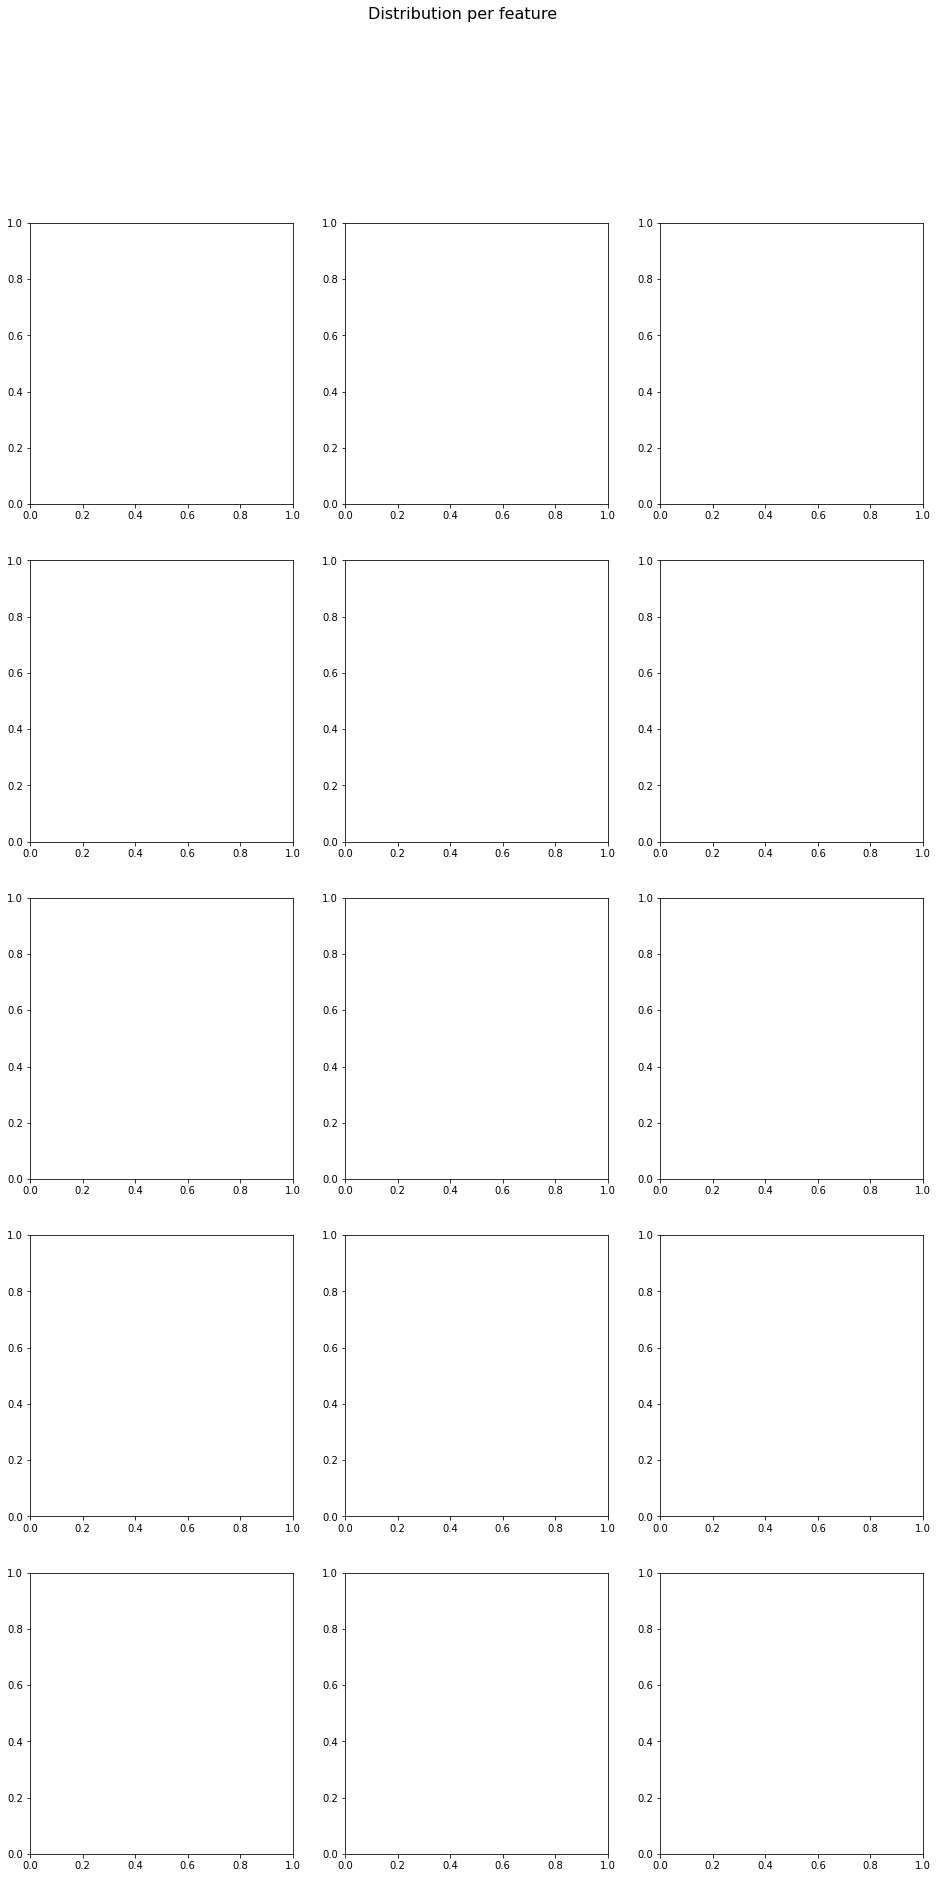

In [96]:

print(len(df), len(gen_samples))
table_evaluator =  TableEvaluator(df, gen_samples)

table_evaluator.visual_evaluation()
